<a href="https://colab.research.google.com/github/JCC-SWE/Data-Science-Research/blob/main/College_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 15
Josh Cubero,
Sai Ram Reddy,
Pradyumn Pundir

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

This block of code reads in the csv file then dispays the first five observations of the dataset.

In [ ]:
dataset = pd.read_csv('College_Admissions.csv')
dataset.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

The following block of code executes and dispalys the dataset's correlation matrix. This is an important step in the
exploratory data analysis phase as the correlation matrix allows us to form preliminary assumptions. This correlation
matrix indicates strong correlations between the independent variables themselves. This would indicate multicollinearity in the data model. Multicollinearity could cause variance inflation and lead to inaccurate predictions on future data other than the training set. Dimensionality reduction will likely be required.

In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#This code creates the X and y variables that will be used later in building the model. The serial no. variable
#has been dropped from the dataset.
X = dataset.iloc[:,1:8]
y = dataset.iloc[:,-1]

The following code displays all independent variables against the dependent variable. The purpose is to gain a visual understanding of the corrleation between the independent variables and the dependent variable. The scatterplots for this dataset support the correlation matrix in that plots with the exception of Research indicate moderate to strong positive correlation with the independent variable Chance of Admit.

<IPython.core.display.Javascript object>


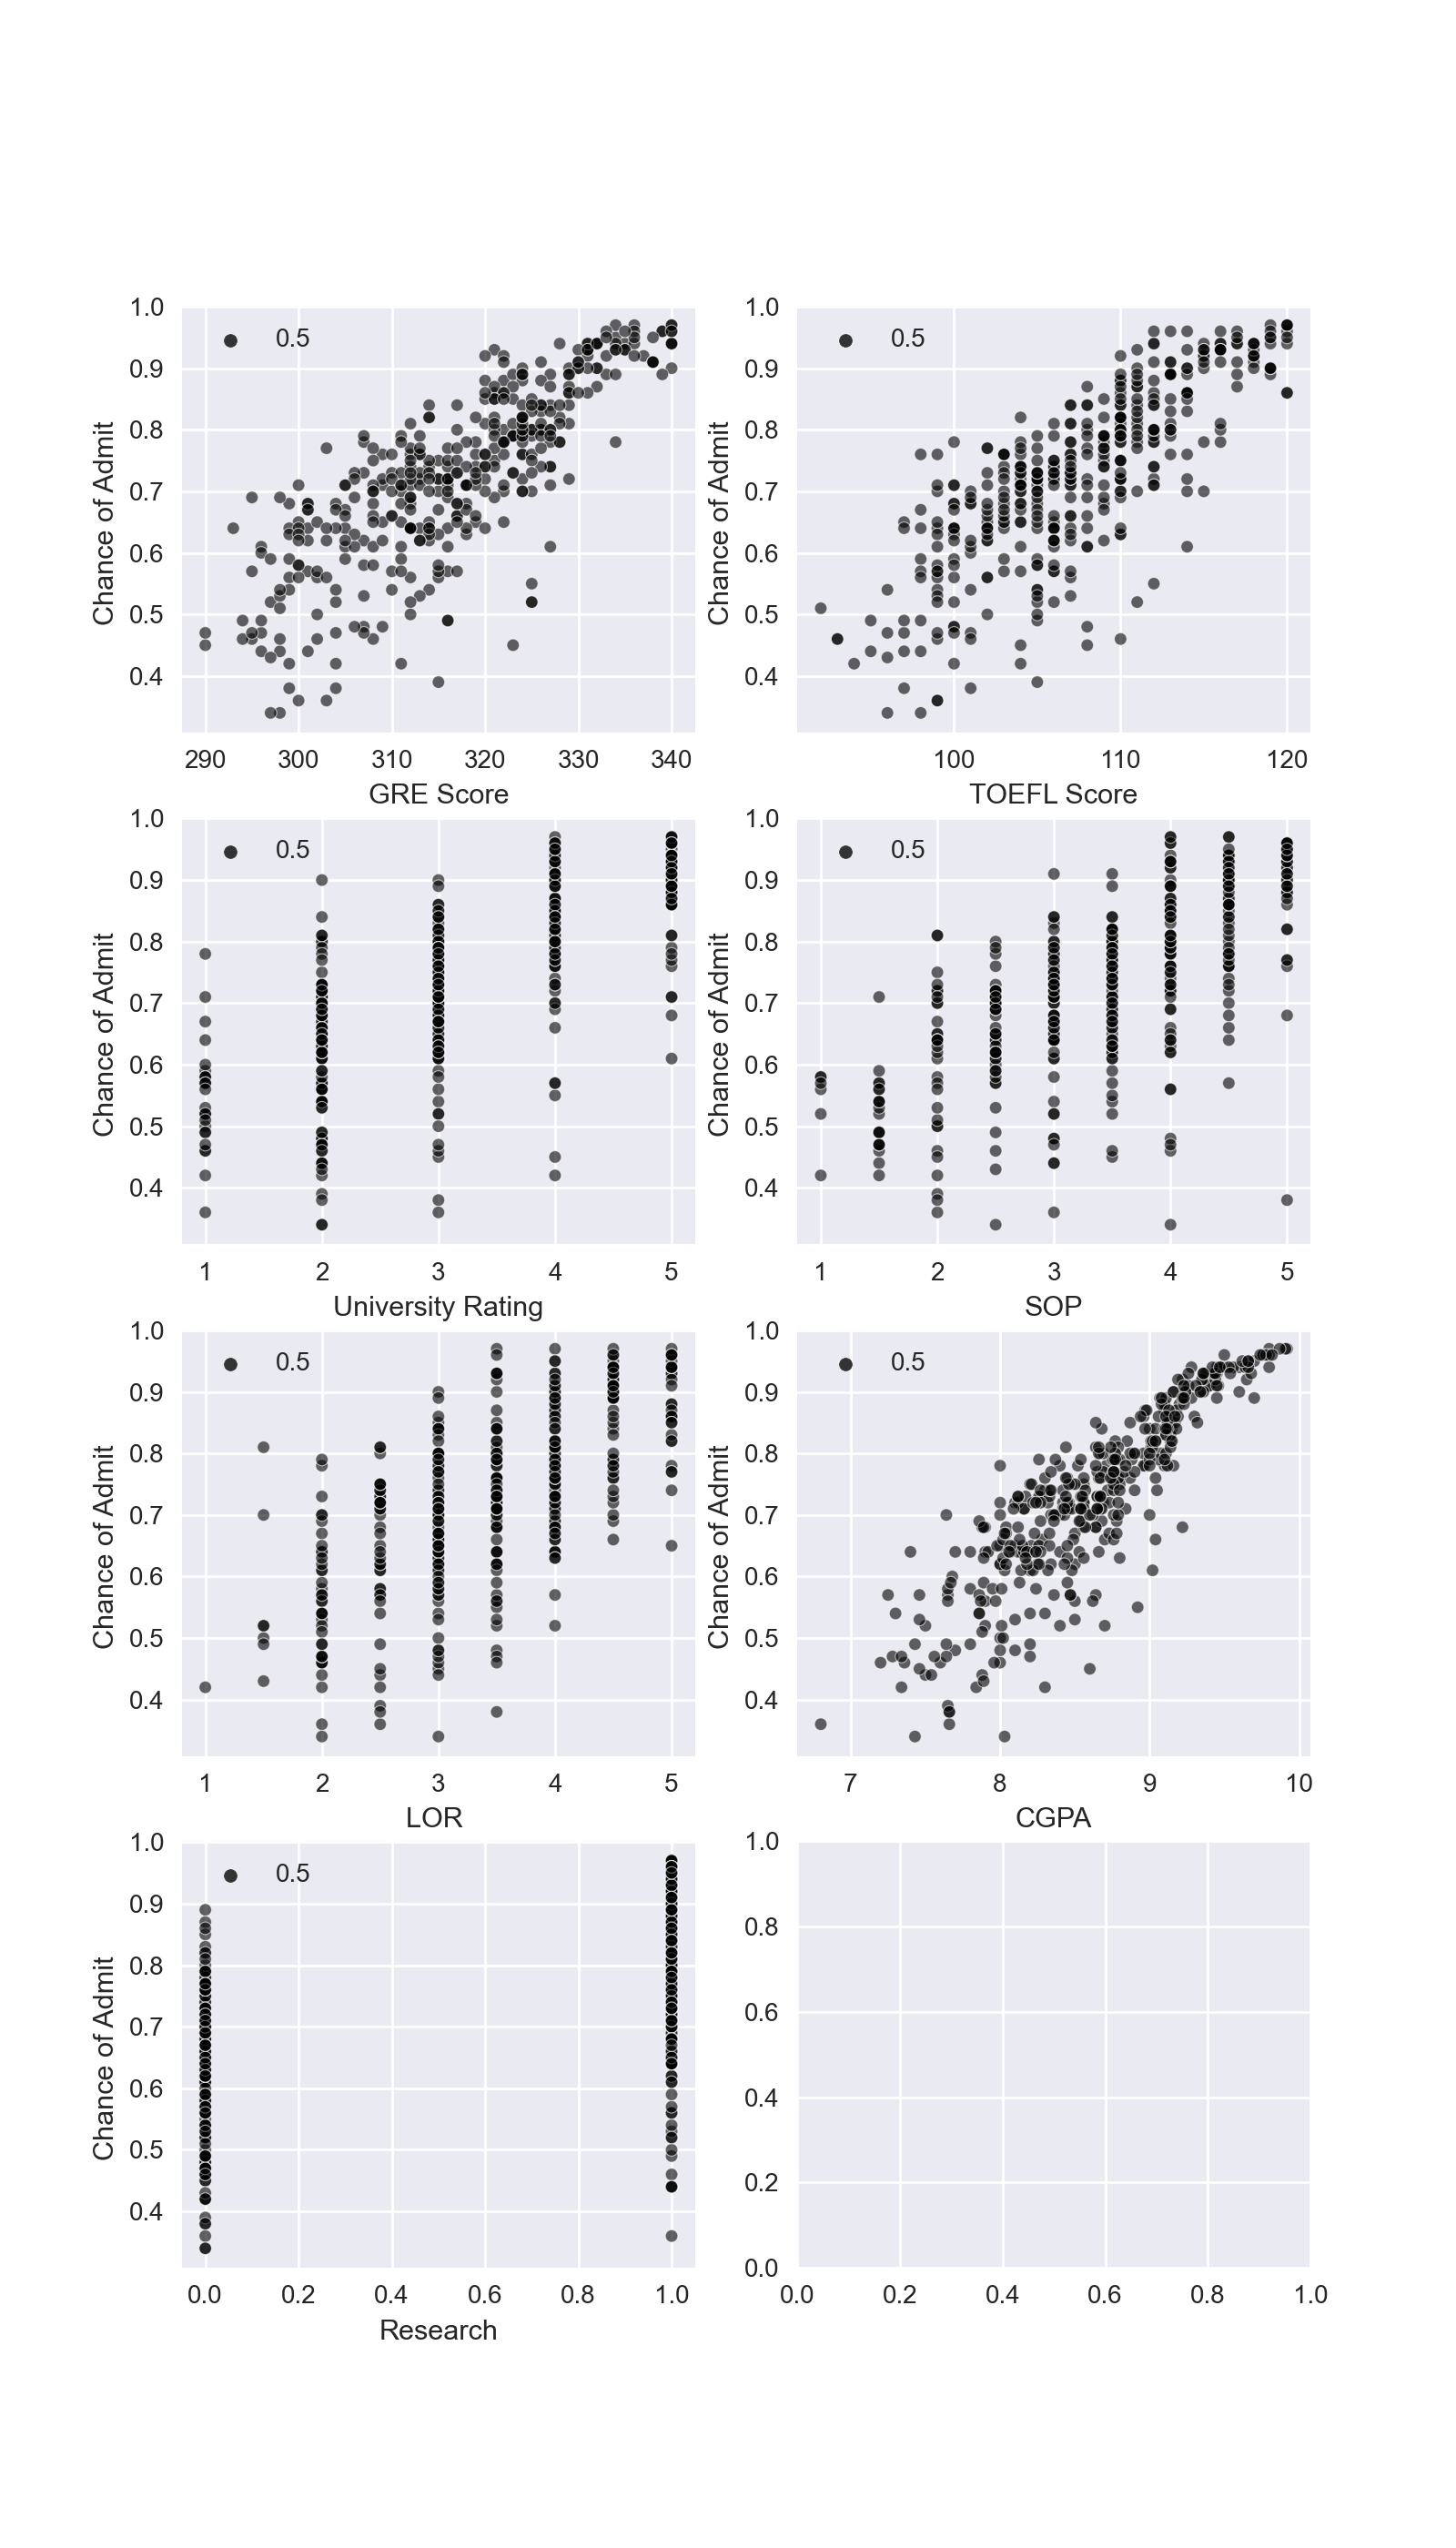

In [ ]:
f, axes = plt.subplots(4,2, figsize=(8,14))
for ax, feature in zip(axes.flat, dataset.iloc[:,1:8].columns):
    sns.scatterplot(x = X[feature],y=dataset.iloc[:,-1],ax=ax,color='black',alpha=0.6,size=0.5)
    plt.show()

The next series of plots are histograms. The histograms for this dataset indicate that the independent variables follow a non-normal distribution. This means that the data will likely need to be standardized.

<IPython.core.display.Javascript object>


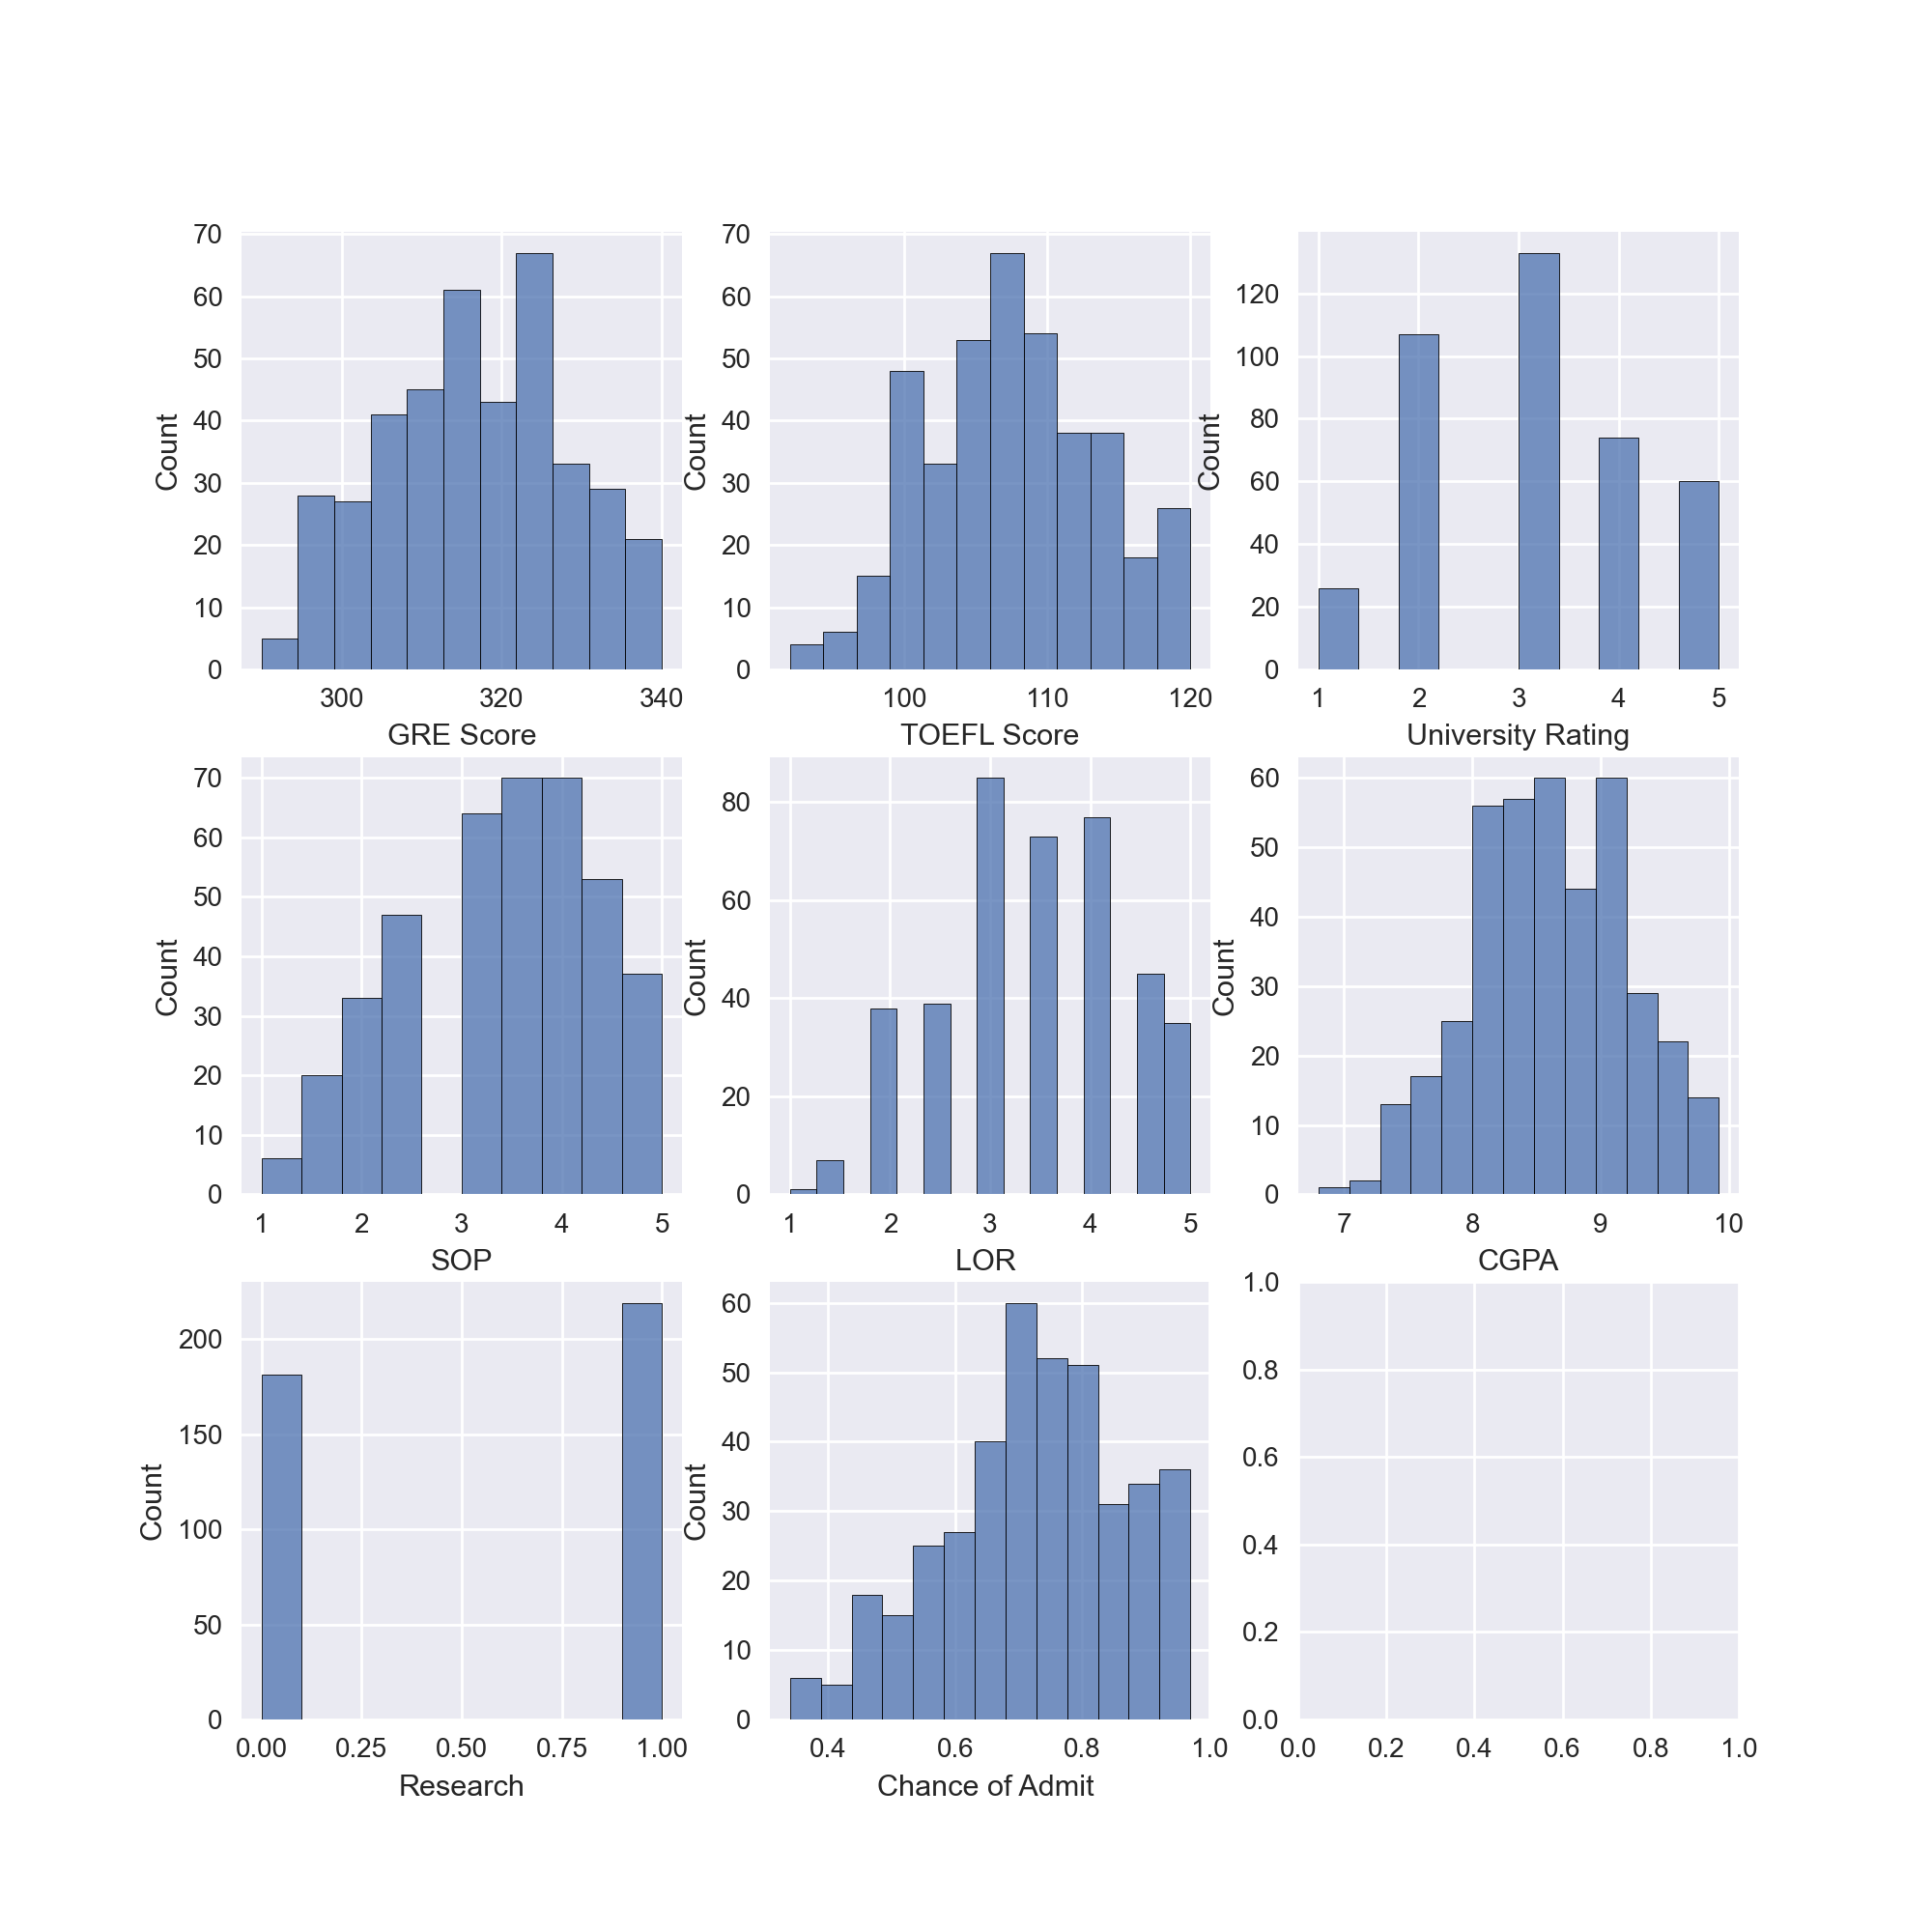

In [ ]:
f, axes = plt.subplots(3,3, figsize=(10,10))
for ax, feature in zip(axes.flat, dataset.iloc[:,1:9].columns):
    sns.histplot(dataset[feature],ax=ax)
    plt.show()

The following function takes an X and y dataset, creates an Ordinary Least Squares Regression model and prints the independent variables with p-value of less or equal to 0.05. Additionally, the function will print the model's summary results.

In [ ]:
def feature_select(X1,Y1,alpha=0.05):

    X1 = sm.add_constant(X1)
    model = sm.OLS(Y1,X1)
    results = model.fit()

    for attributeIndex in range (0, len(X1.columns)):
        if results.pvalues[attributeIndex] <= alpha:
            print(f'{X1.columns[attributeIndex]}: {round(results.pvalues[attributeIndex],6)}')
    print(results.summary())
    print()

The OLS summary returns a similar R-squared as the Linear Regression model. Of note however, the independent variables University Rating and SOP both have p-values in excess of 0.05 which means they're not statistically significant. These two variables should be removed from the data model.

In [ ]:
feature_select(X,y)

const: 0.0
GRE Score: 0.00387
TOEFL Score: 0.00768
LOR : 6.6e-05
CGPA: 0.0
Research: 0.002208
                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          3.12e-134
Time:                        08:58:54   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [ ]:
#The next two lines of code create the StandScaler object and scales the independent variables.
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
#Creates the training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

The following block of code creates the Linear Regression model and prints the model's R-squared. The R-squared value here is 0.80, which indicates that ~80% of the variation in Chance of Admit is attributed to the model itself. The other 20% is due to chance. The team would like to further understand more about the independent variables.

In [ ]:
lin = LinearRegression()
lin.fit(X_train,y_train)
lin.score(X_test,y_test)

0.8001063801904392

The next block of code creates the mean square error of the pre-PCA dataset, and a Pandas dataframe with the actual outcomes and the predicted outcomes. The MSE is 0.0037 which indicates the model's error is extremely narrow.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_hat_train = lin.predict(X_train)
y_hat_test = lin.predict(X_test)

MSE_train = round(mean_squared_error(y_train,y_hat_train),4)
MSE_test = round(mean_squared_error(y_test,y_hat_test),4)

y_hat = np.array(y_hat_test).flatten()
y_actual = np.array([y_test]).flatten()
check = pd.DataFrame({'Pre PCA Actual': y_actual, 'Pre PCA Predicted': np.round(y_hat_test,2)})

print(f'Pre PCA MSE Training Set: {MSE_train}')
print(f'Pre PCA MSE Test Set: {MSE_test}')
check.head()

Pre PCA MSE Training Set: 0.0041
Pre PCA MSE Test Set: 0.0037


Pre PCA Actual  Pre PCA Predicted
0            0.52               0.50
1            0.53               0.62
2            0.72               0.64
3            0.71               0.64
4            0.78               0.69

In [ ]:
#This block of code creates a PCA object, model, and a Pandas dataframe to be used in the analysis.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcaComp = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = pcaComp
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(principalDf, y, test_size=0.2, random_state=35)

The next block of code creates the post PCA linear regression model and fits the model to the data. Additionally, this block of code prints the model's linear regression score. The post PCA linear regression model's R-squared is 0.74, which is just slightly lower than the pre-PCA model's R-squared.

In [ ]:
lin2 = LinearRegression()
lin2.fit(X_train2,y_train2)
lin2.score(X_test2,y_test2)

0.7487822601430535

This block of code creates the mean squared error for the post-PCA model and the pandas dataframe of the actual and predicted outcomes. The post-PCA MSE is is 0.00566, which is a very narrow MSE.

In [ ]:
y_hat2_test = lin2.predict(X_test2)
y_hat2_train = lin2.predict(X_train2)

MSE2_train = round(mean_squared_error(y_train2,y_hat2_train),5)
MSE2_test = round(mean_squared_error(y_test2,y_hat2_test),5)

y_hat2 = np.array(y_hat2_test).flatten()
y_actual2 = np.array([y_test2]).flatten()
check2 = pd.DataFrame({'Post PCA Actual': y_actual2, 'Post PCA Predicted': np.round(y_hat2_test,2)})

print(f'Post PCA Training MSE: {MSE2_train}')
print(f'Post PCA Test MSE: {MSE2_test}')

check2.head()

Post PCA Training MSE: 0.00442
Post PCA Test MSE: 0.00566


Post PCA Actual  Post PCA Predicted
0             0.78                0.87
1             0.93                0.92
2             0.34                0.58
3             0.54                0.52
4             0.63                0.61

The  following block of code depicts the pre-PCA model's actual outcome vs predicted outcome. The purpose is to give a visual frame of reference for business audiences and those not versed in statistical analysis.  

<IPython.core.display.Javascript object>


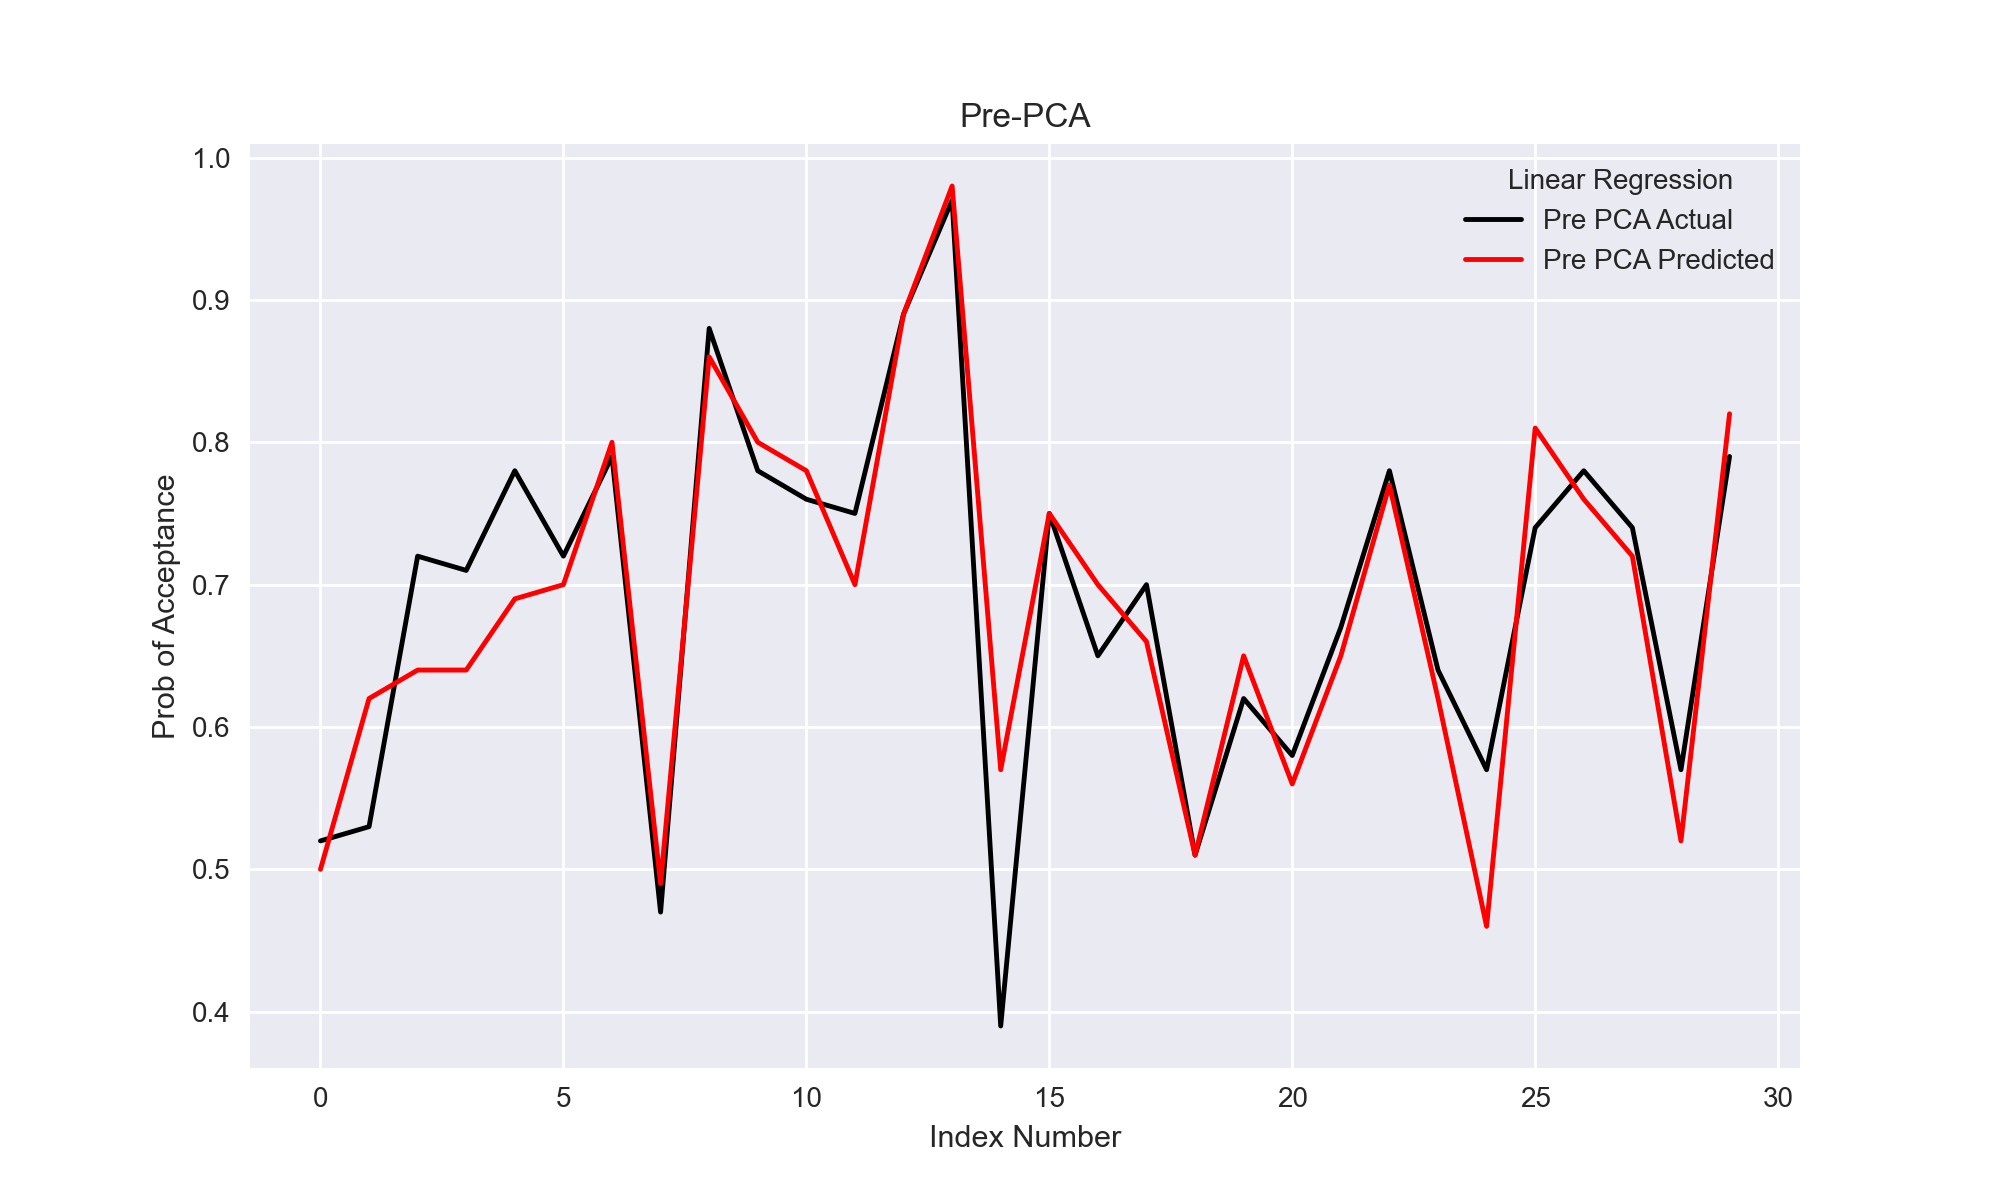

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(check['Pre PCA Actual'][0:30],label = 'Pre PCA Actual',color='black')
plt.show()
plt.plot(check['Pre PCA Predicted'][0:30],label = 'Pre PCA Predicted',color='r')
plt.title("Pre-PCA")
plt.xlabel('Index Number')
plt.ylabel('Prob of Acceptance')
plt.legend(title = 'Linear Regression')
plt.show()

The next block of code depicts the post-PCA model's actual outcome vs predicted outcome. The purpose here is to provide a visual frame of reference to compare against the pre-PCA's model. One can see that the post-PCA model missed some of the seasonality in the data that the pre-PCA model was able to predict. Likewise, the post-PCA model was able to find seasonality that the pre-PCA model missed.

<IPython.core.display.Javascript object>


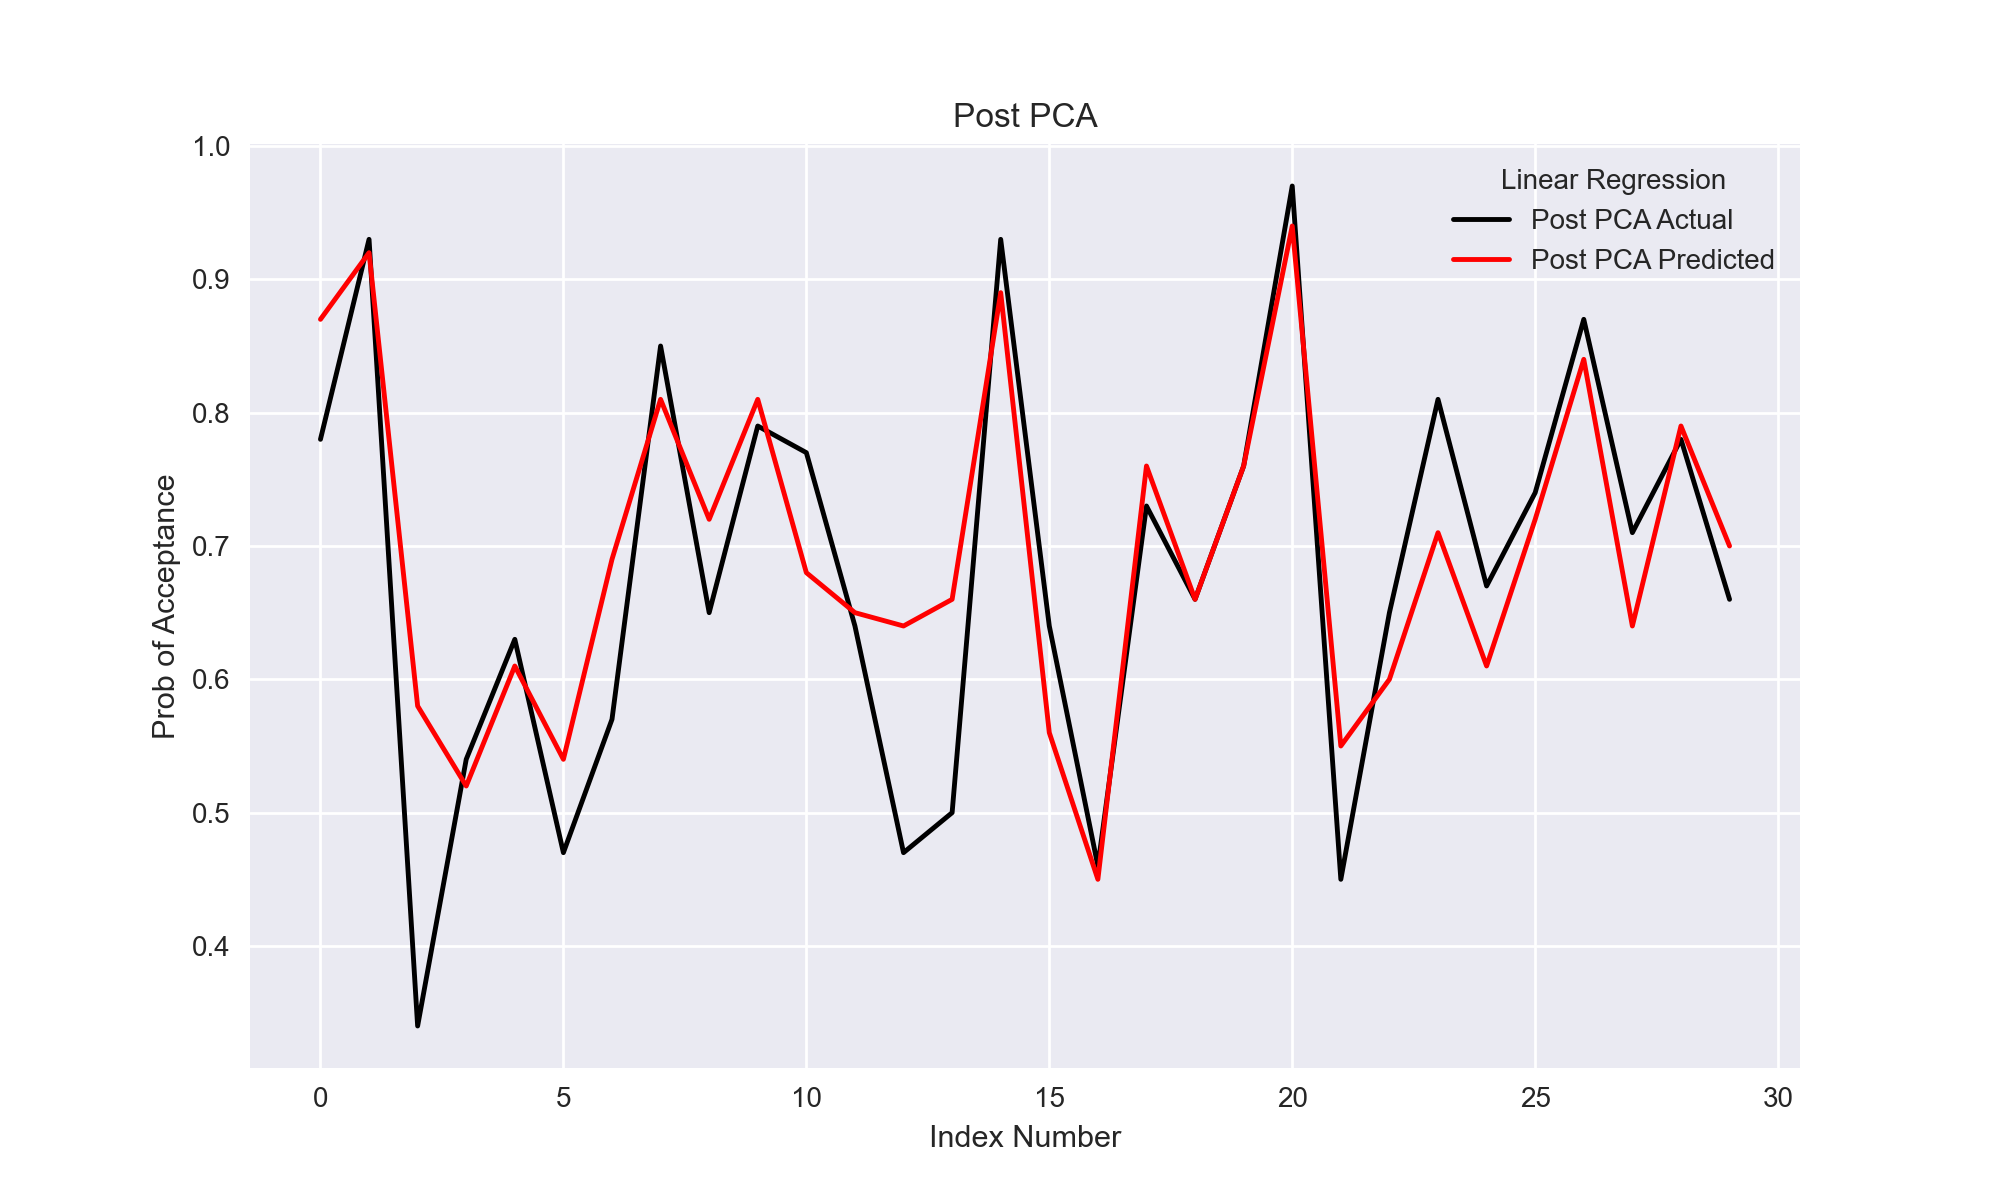

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Post PCA")
plt.plot(check2['Post PCA Actual'][0:30],label = 'Post PCA Actual',color='black')
plt.show()
plt.plot(check2['Post PCA Predicted'][0:30],label = 'Post PCA Predicted',color='r')
plt.xlabel('Index Number')
plt.ylabel('Prob of Acceptance')
plt.legend(title = 'Linear Regression')
plt.show()

The next plot depicts the relationship between the PCA components and the actual outcomes. The purpose is to create a frame of reference to visually compare the relationships between the PCA componets vs both the actual and predicted outcomes. One can see that component PCA 1 has a strong-negative correlation to the actual outcome. While PCA 2 has a weak correlation to the actual outcome field.

<IPython.core.display.Javascript object>


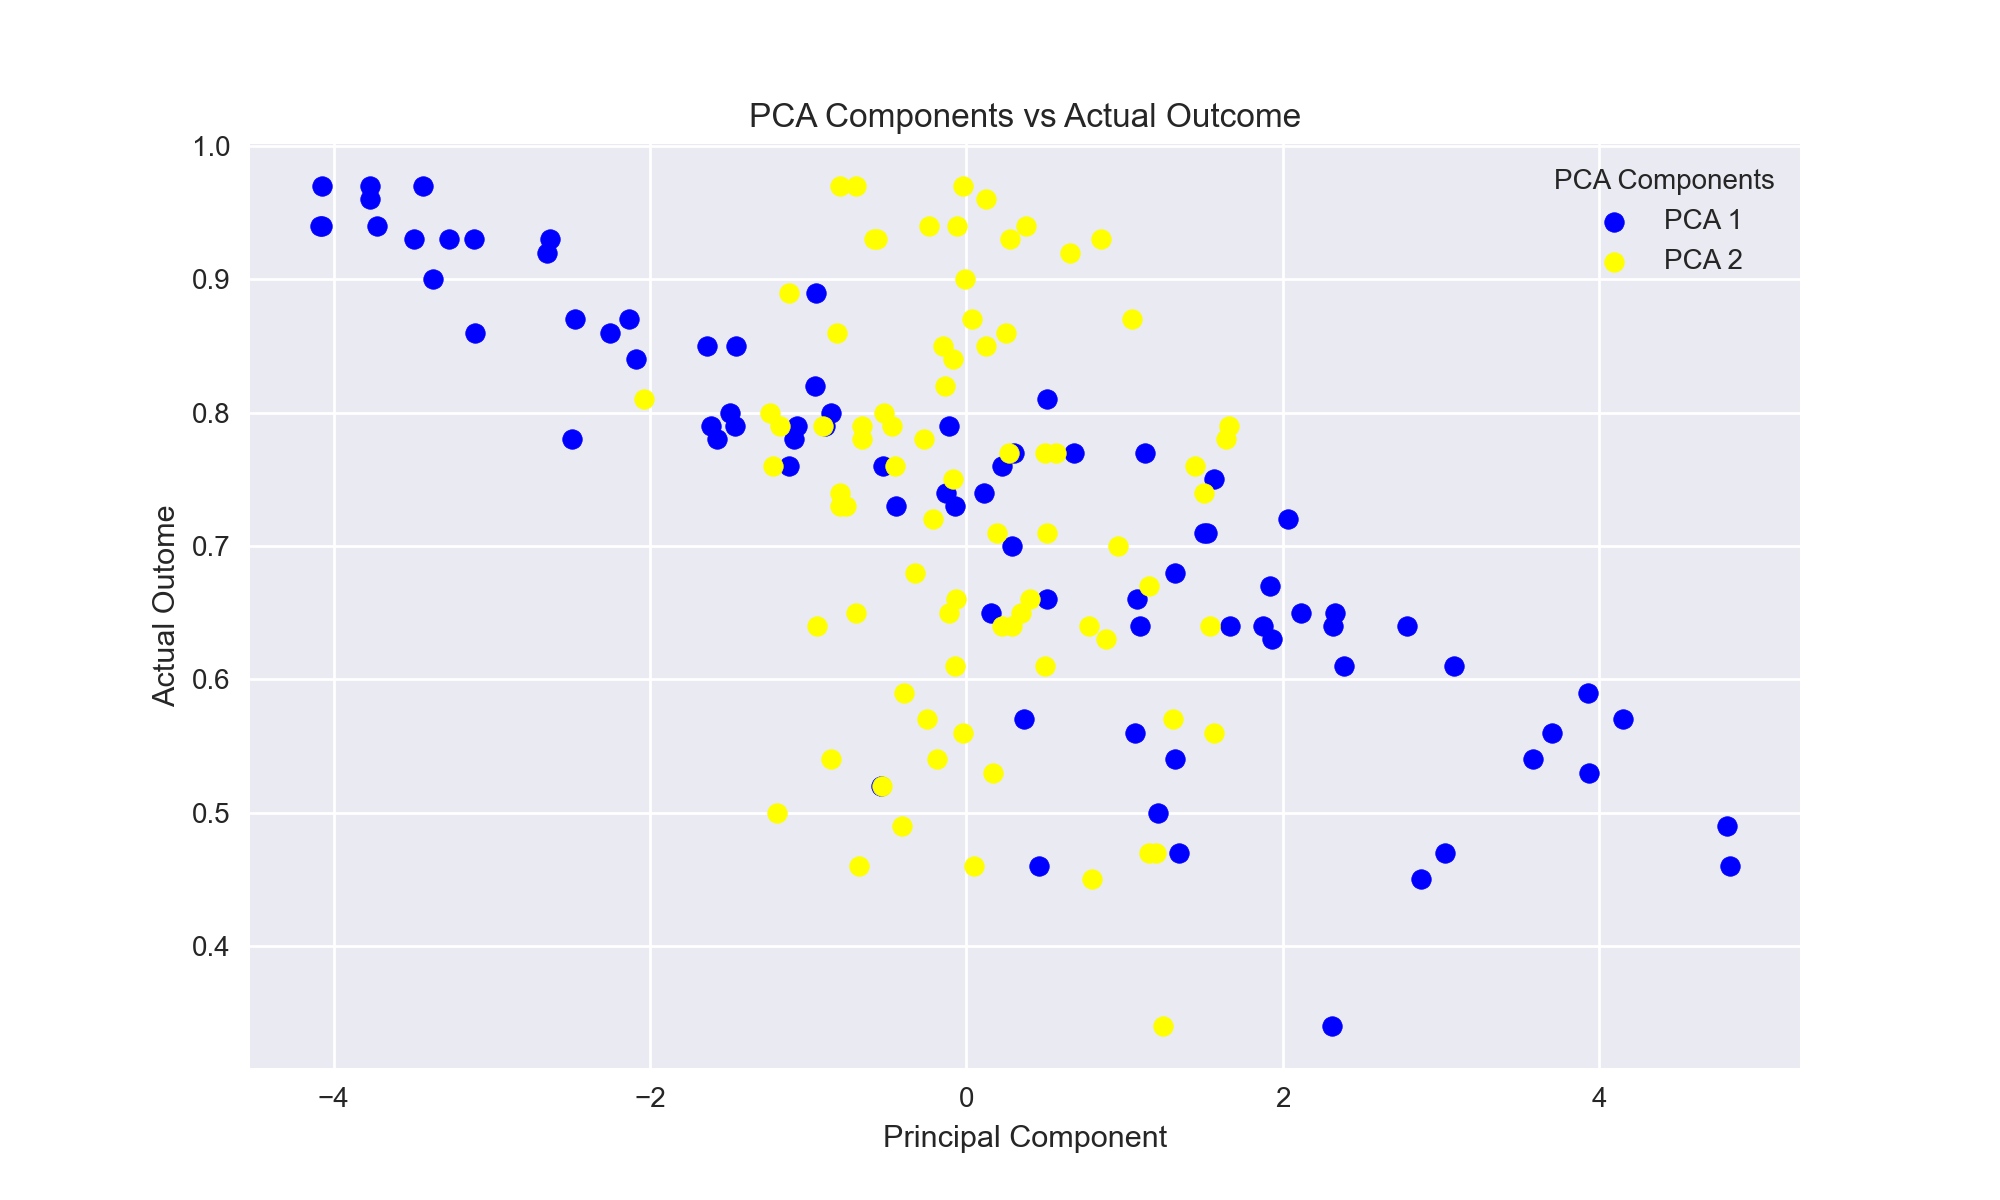

In [ ]:
plt.figure(figsize=(10,6))
plt.title('PCA Components vs Actual Outcome')
plt.scatter(X_test2['principal component 1'],y_test2,color = 'blue',label = 'PCA 1')
plt.scatter(X_test2['principal component 2'],y_test2,color = 'yellow',label = 'PCA 2')
plt.xlabel('Principal Component')
plt.ylabel('Actual Outome')
plt.legend(title = 'PCA Components')
plt.show()

The next visual is the depiction of the post-PCA components vs the predicted outcome. The PCA component 1 has a linear, strong-negative correlation with the predicted outcome.

<IPython.core.display.Javascript object>


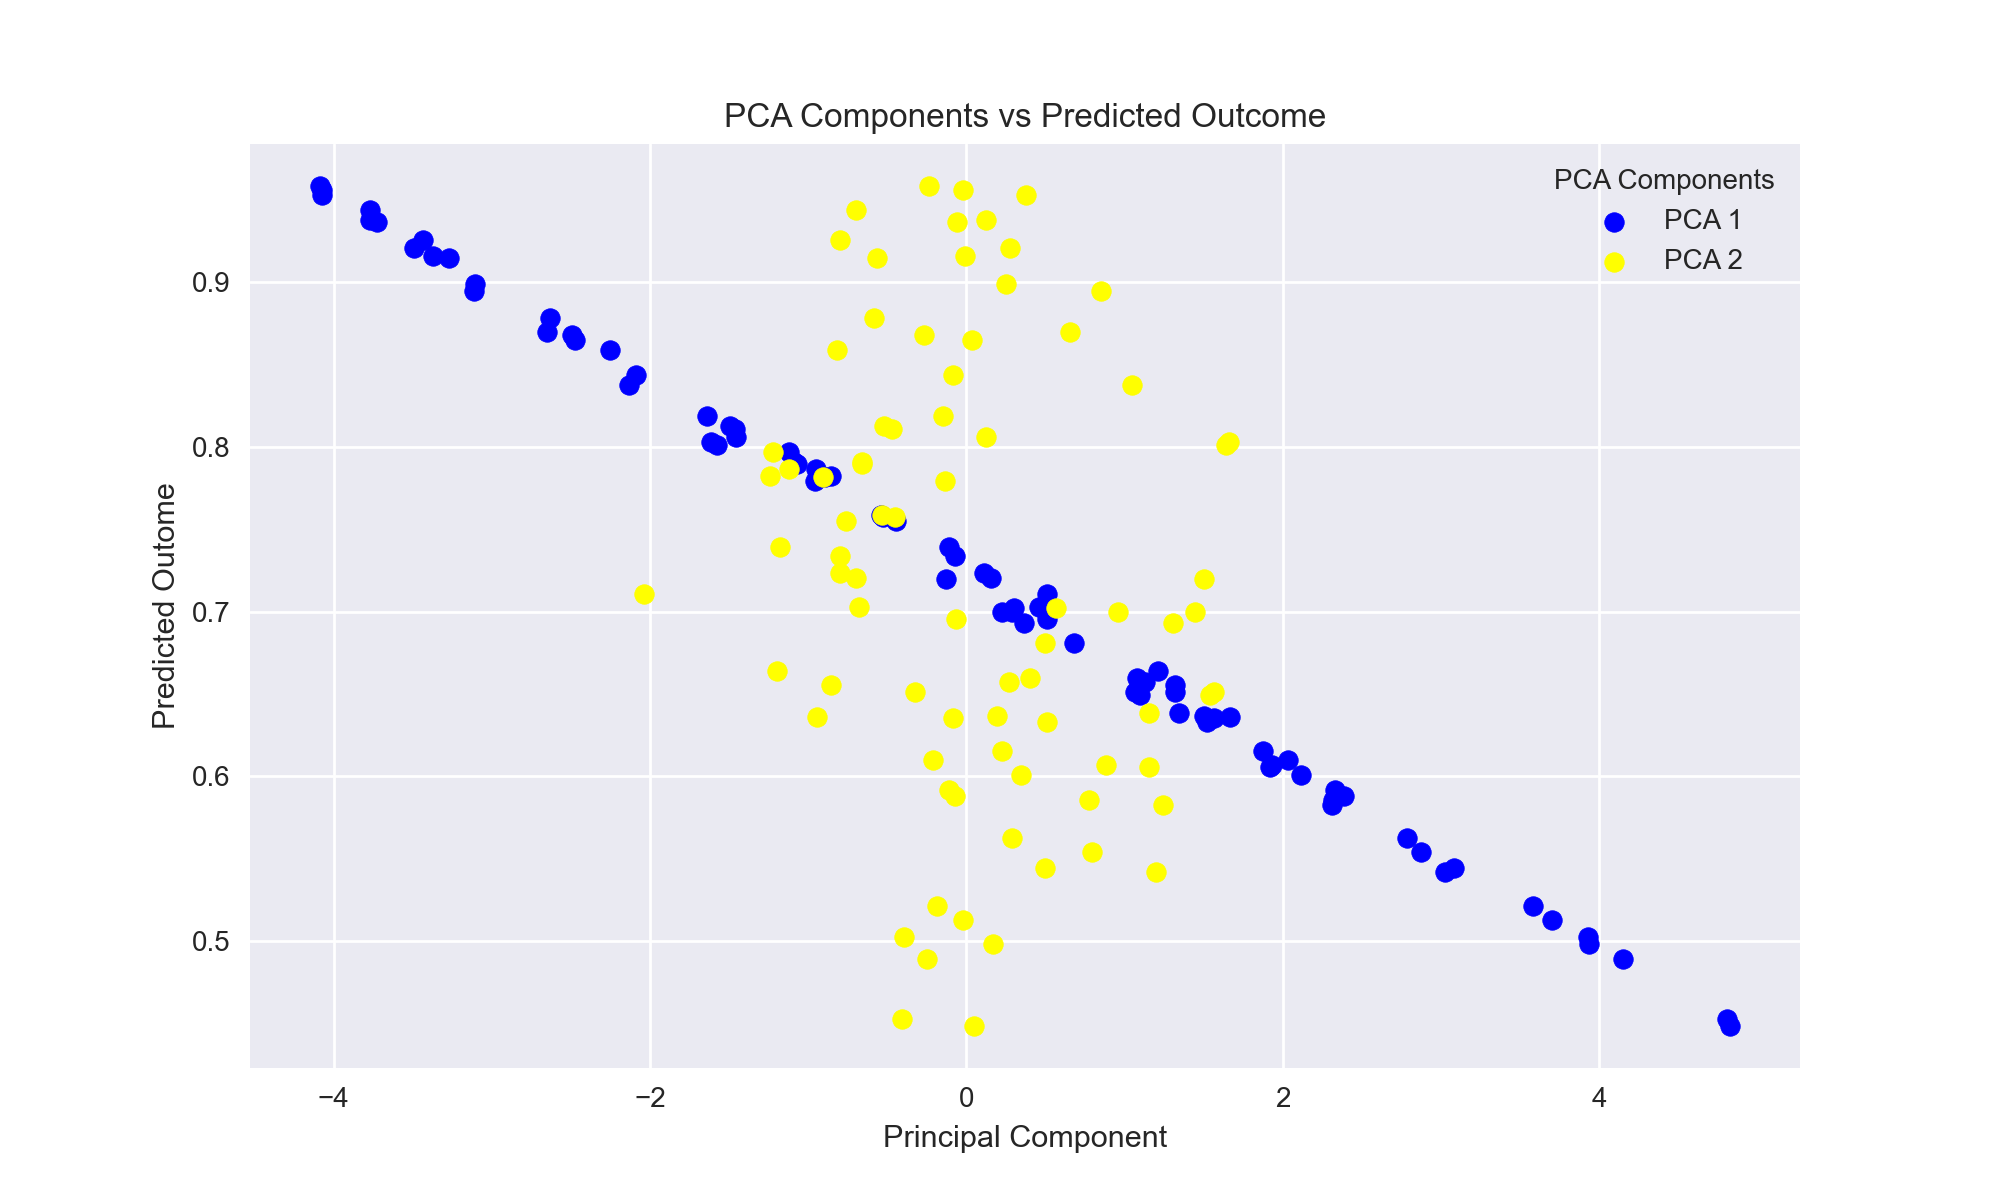

[]

In [ ]:
plt.figure(figsize=(10,6))
plt.title('PCA Components vs Predicted Outcome')
plt.scatter(X_test2['principal component 1'],y_hat2,color = 'blue',label = 'PCA 1')
plt.scatter(X_test2['principal component 2'],y_hat2,color = 'yellow',label = 'PCA 2')
plt.xlabel('Principal Component')
plt.ylabel('Predicted Outome')
plt.legend(title = 'PCA Components')
plt.plot()

In [ ]:
final_df = pd.DataFrame({'Pre PCA Predicted': np.round(y_hat_test,2), 'Post PCA Predicted': np.round(y_hat2_test,2)})

In [ ]:
final_df.to_csv('Output.csv')

# End of requirements, this next block seeks to explore different types of models.

# Decision Tree

MSE: 0.00566


<IPython.core.display.Javascript object>


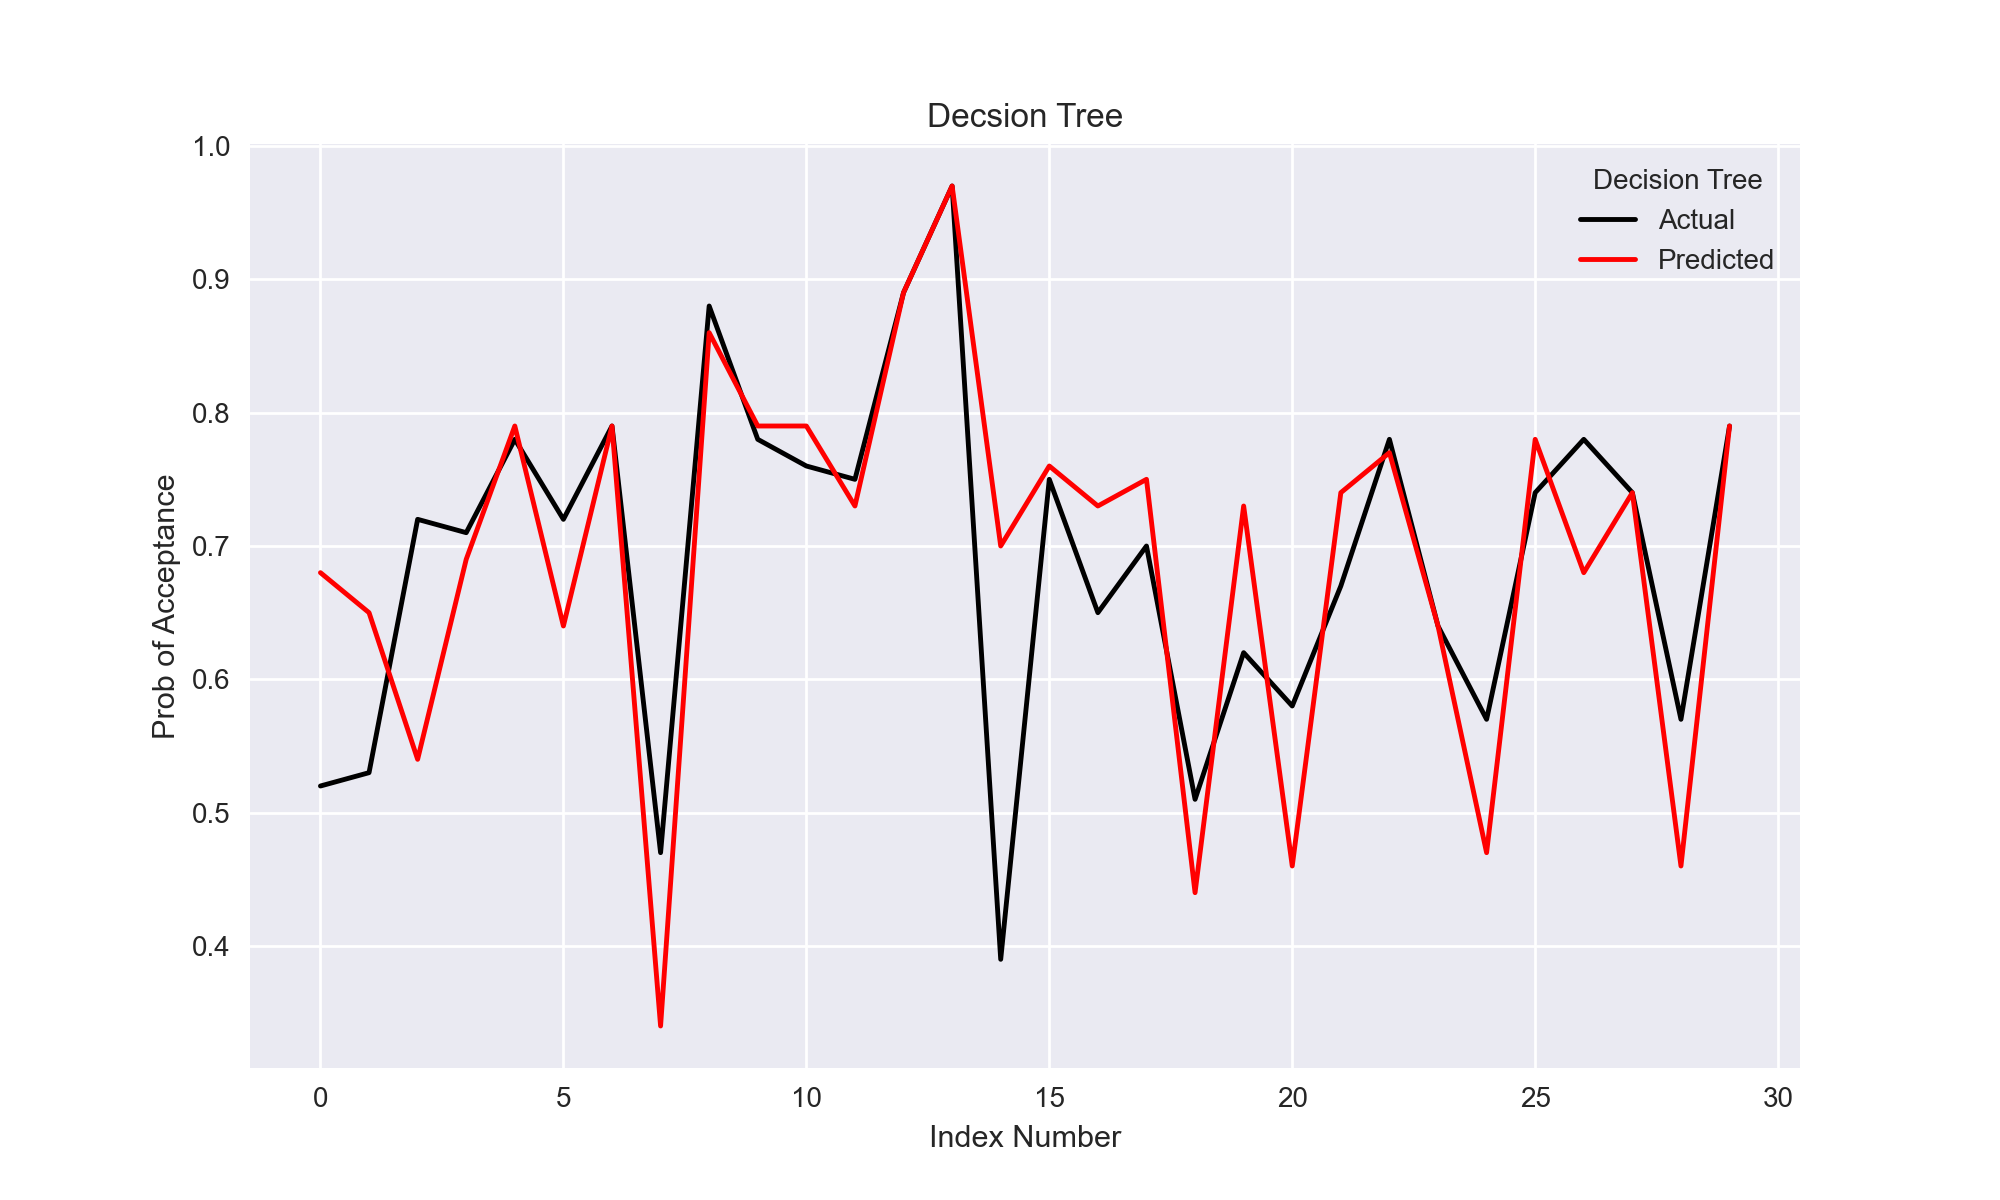

MSE Decision Tree =>  0.010413749999999998


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

y_hat3 = np.array(y_pred_dt).flatten()
y_actual3 = np.array([y_test]).flatten()
check3 = pd.DataFrame({'Actual': y_actual3, 'Predicted': np.round(y_hat3,2)})
print(f'MSE: {MSE2_test}')
check3.head()

plt.figure(figsize=(10,6))
plt.title("Decsion Tree")
plt.plot(check3['Actual'][0:30],label = 'Actual',color='black')
plt.plot(check3['Predicted'][0:30],label = 'Predicted',color='r')
plt.xlabel('Index Number')
plt.ylabel('Prob of Acceptance')
plt.legend(title = 'Decision Tree')
plt.show()

print("MSE Decision Tree => ", mean_squared_error(y_pred_dt, y_test))

Post PCA MSE: 0.00566


<IPython.core.display.Javascript object>


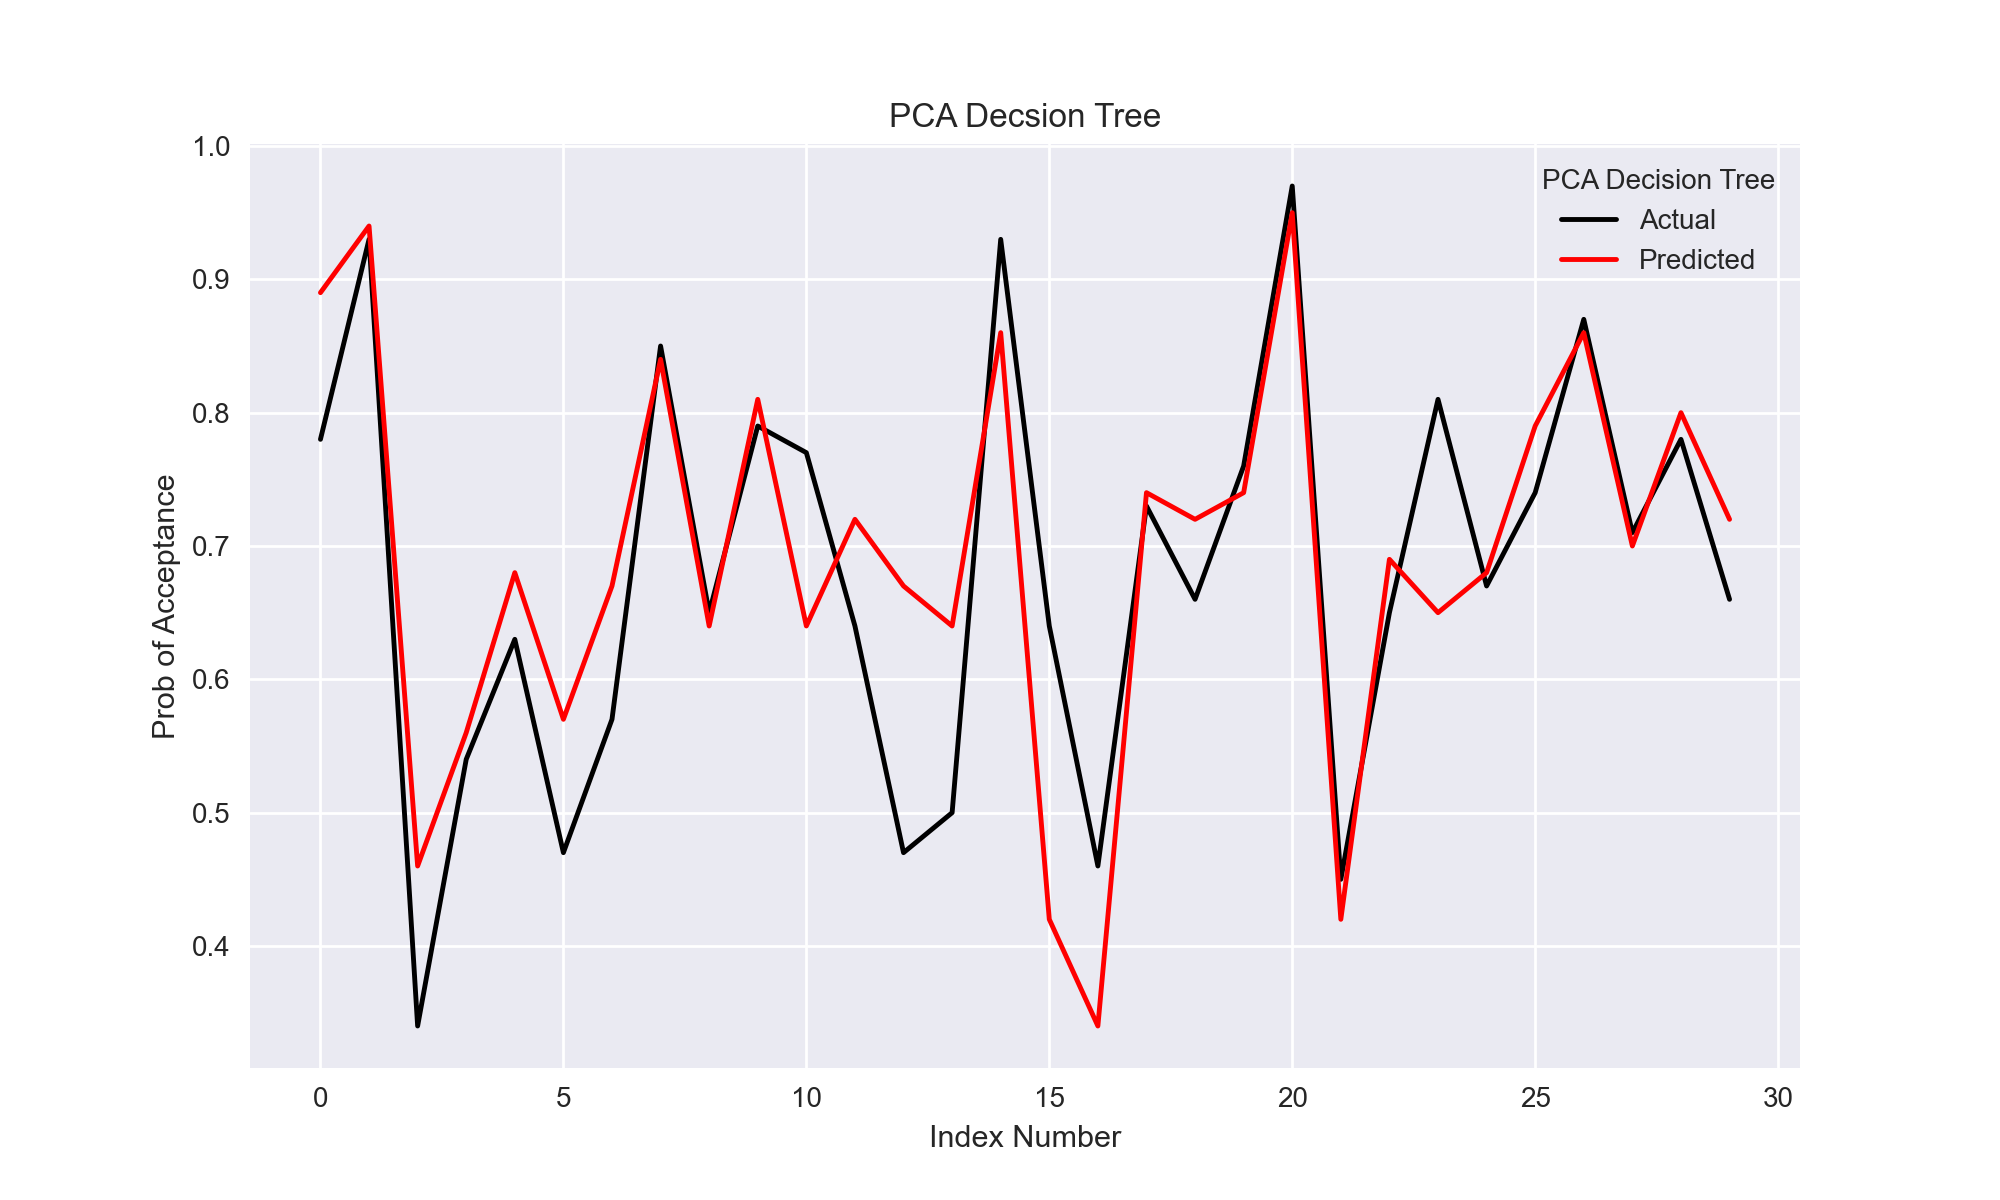

MSE Decision Tree =>  0.010413749999999998


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train2, y_train2)
y_pred_dt2 = dt.predict(X_test2)

y_hat4 = np.array(y_pred_dt2).flatten()
y_actual4 = np.array([y_test2]).flatten()
check4 = pd.DataFrame({'Actual': y_actual4, 'Predicted': np.round(y_hat4,2)})
print(f'Post PCA MSE: {MSE2_test}')
check4.head()

plt.figure(figsize=(10,6))
plt.title("PCA Decsion Tree")
plt.plot(check4['Actual'][0:30],label = 'Actual',color='black')
plt.plot(check4['Predicted'][0:30],label = 'Predicted',color='r')
plt.xlabel('Index Number')
plt.ylabel('Prob of Acceptance')
plt.legend(title = 'PCA Decision Tree')
plt.show()

print("MSE Decision Tree => ", mean_squared_error(y_pred_dt, y_test))

In [ ]:
def buildGd(X, y, X_test, y_test, error):
    """
        Taking the initial weight matrix = 0
        bias = 0
        and the learning rate i.e. alpha to be 0.01
    """
    m, n = X.shape
    weight = np.zeros(n)
    bias = 0
    alpha = 0.01

    """
    Gradient Descent
    """

    for i in range(1000): # 1000 -> number of iterations.
        y_pred = np.matmul(X, weight) + bias
        weight = weight - (alpha * ((1/m) * (np.matmul(X.T, (y_pred - y)))))
        bias = bias - (alpha * ((1/m) * np.sum((y_pred - y))))

        y_new = predict(weight, bias, X_test)
        MSE = mean_squared_error(y_test,y_new)

        error.append(MSE) # Appending the serror after each iteration
error = []

def predict(w, b, X): # predicts the values target variable on the test dataset.
    y_pred = np.dot(X, w) + b
    return y_pred

buildGd(X_train, y_train, X_test, y_test, error) # calling our function

<IPython.core.display.Javascript object>


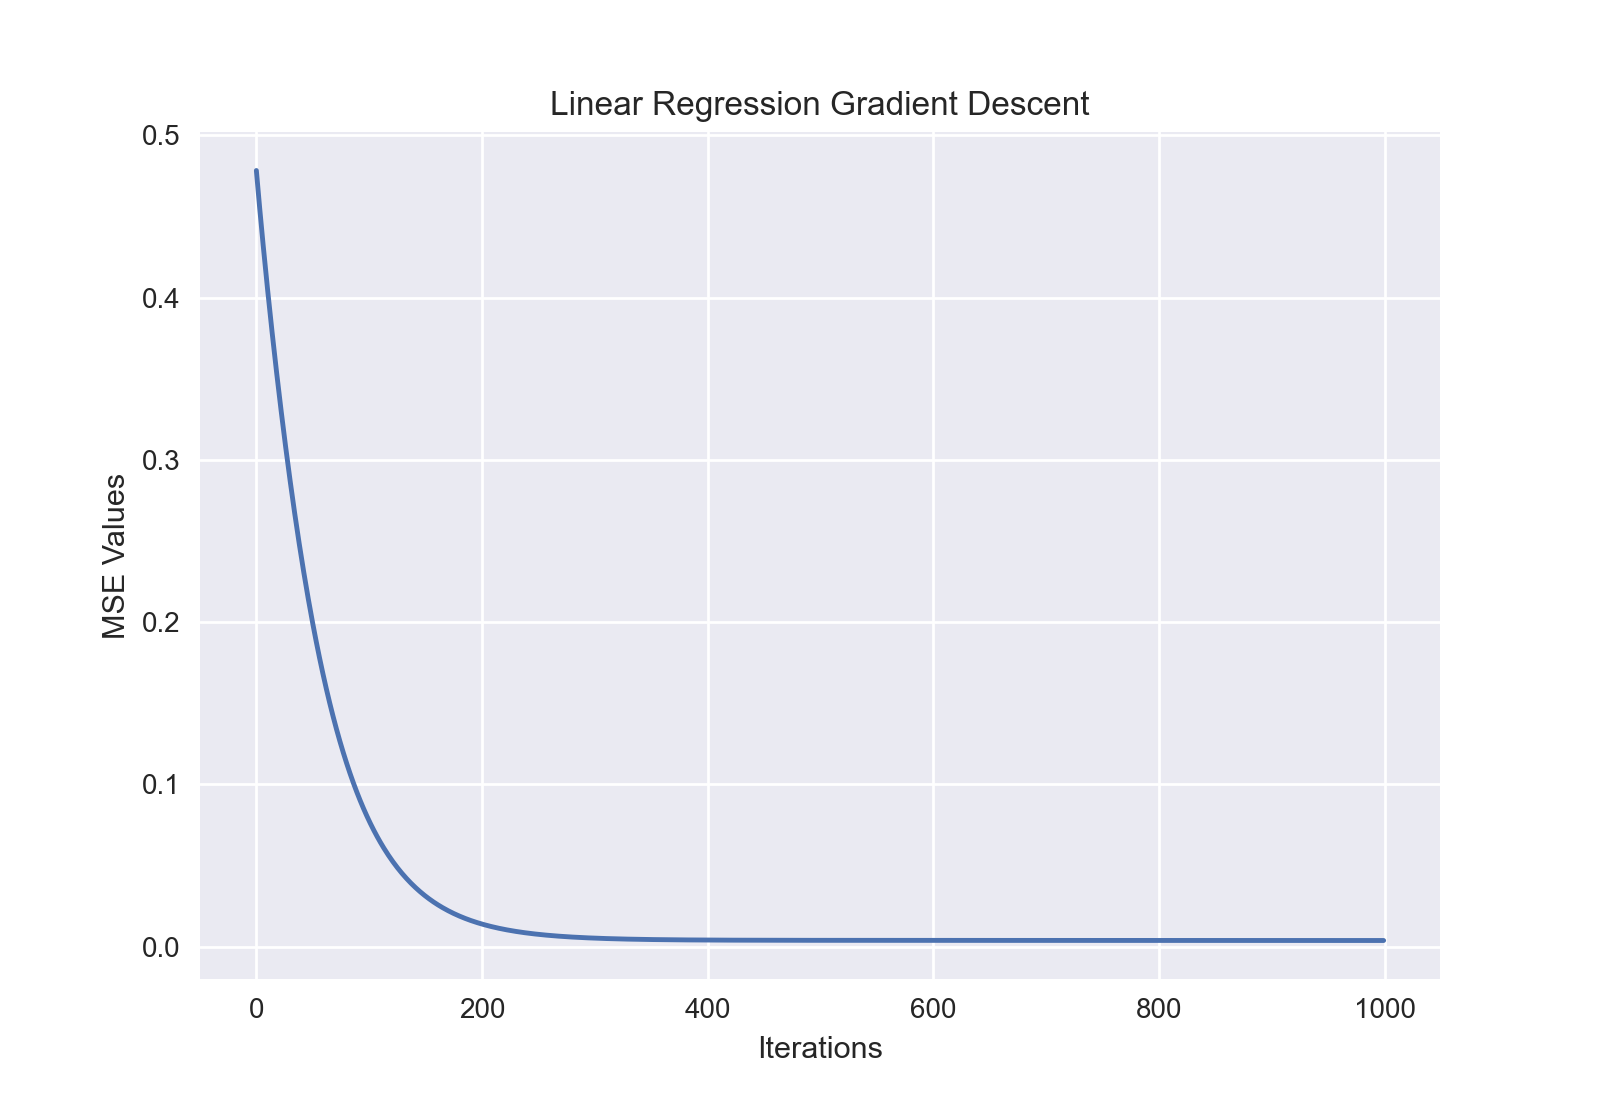

Text(0.5, 1.0, 'Linear Regression Gradient Descent')

In [ ]:
"""
Plotting the MSE values v/s Number of iterations
"""

plt.plot(error)
plt.xlabel("Iterations")
plt.ylabel("MSE Values")
plt.title('Linear Regression Gradient Descent')

In [ ]:
# Best Possible MSE values using the Gradient Descent Approach
print(error[-1])

0.003769331555209464


In [ ]:
error_2 = []
buildGd(X_train2, y_train2, X_test2, y_test2, error_2)

<IPython.core.display.Javascript object>


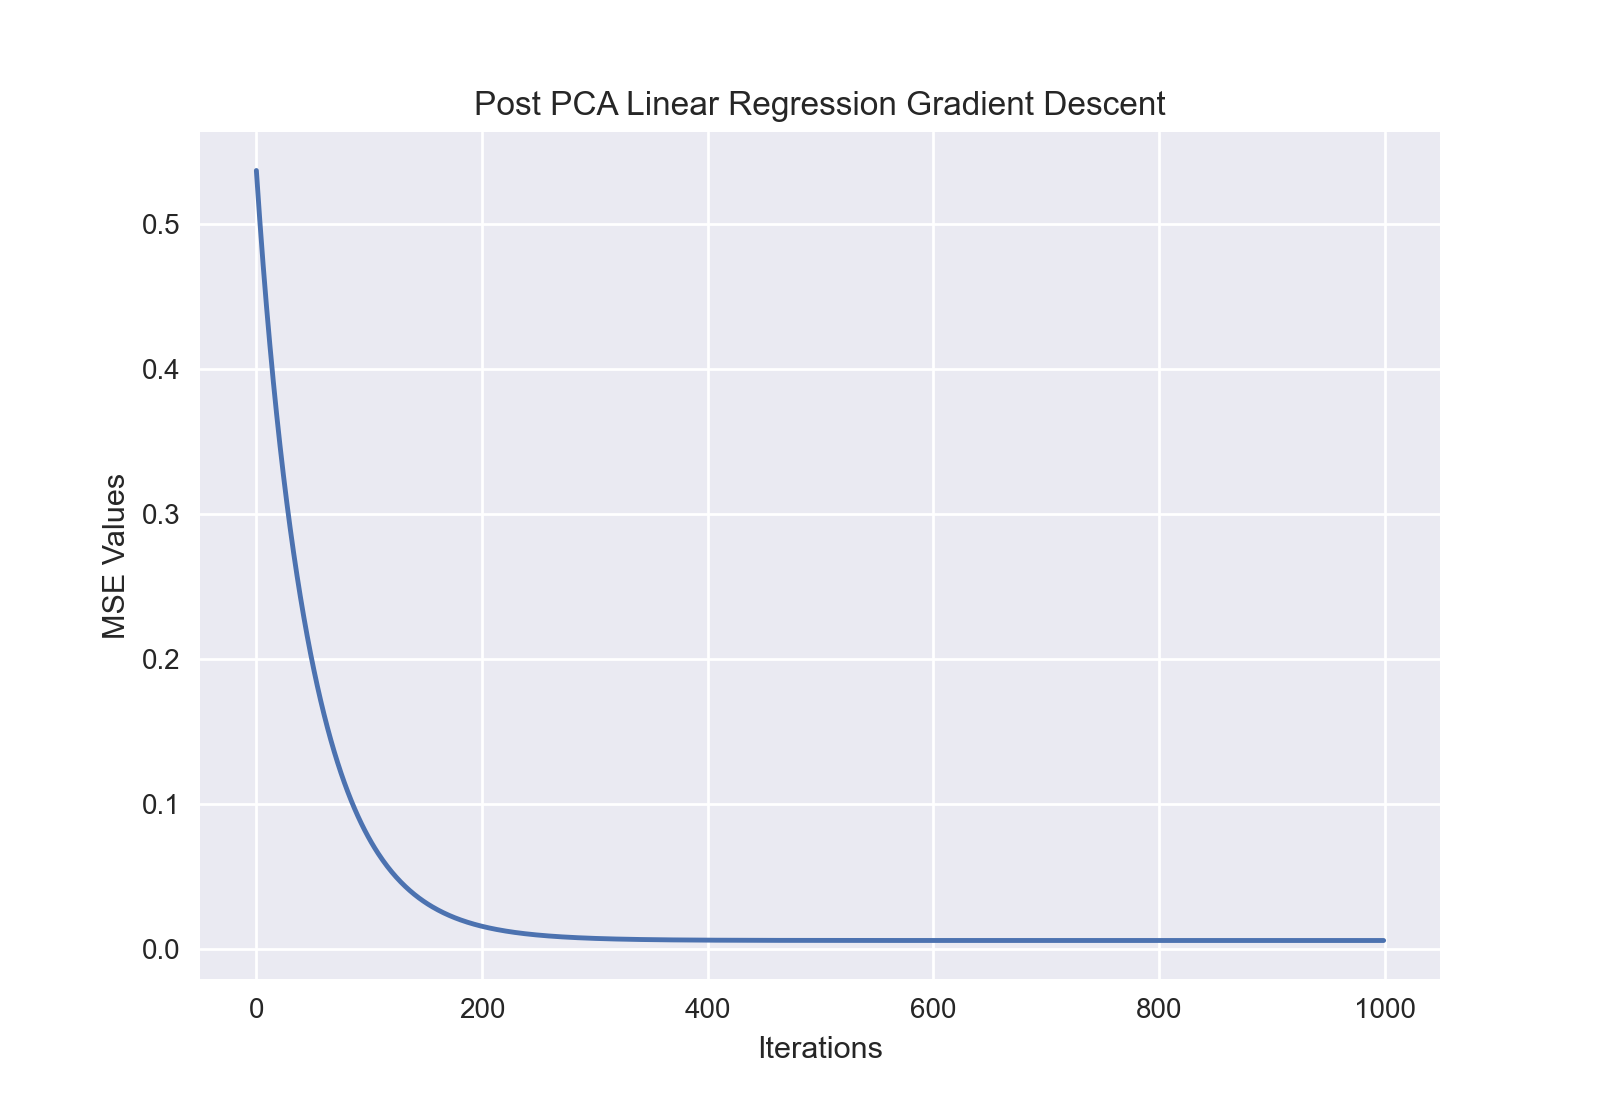

Text(0.5, 1.0, 'Post PCA Linear Regression Gradient Descent')

In [ ]:
plt.plot(error_2)
plt.xlabel("Iterations")
plt.ylabel("MSE Values")
plt.title('Post PCA Linear Regression Gradient Descent')

In [ ]:
print(error_2[-1])

0.005658726346731905


In [ ]:
final_df = pd.DataFrame({'Pre PCA Predicted': np.round(y_hat_test,2), 'Post PCA Predicted': np.round(y_hat2_test,2)})
final_df.to_csv('Output.csv')

<h1> Thank You ! </h1>